In [1]:
# Import statements
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Load the data into a pandas DataFrame
df = pd.read_json('bulk_data_default_cards.json')

df.head()

,object,id,oracle_id,multiverse_ids,mtgo_id,mtgo_foil_id,tcgplayer_id,cardmarket_id,name,lang,...,tcgplayer_etched_id,attraction_lights,color_indicator,life_modifier,hand_modifier,printed_type_line,printed_text,content_warning,flavor_name,variation_of
0,card,0000579f-7b35-4ed3-b44c-db2a538066fe,44623693-51d6-49ad-8cd7-140505caf02f,[109722],25527.0,25528.0,14240.0,13850.0,Fury Sliver,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,card,00006596-1166-4a79-8443-ca9f82e6db4e,8ae3562f-28b7-4462-96ed-be0cf7052ccc,[189637],34586.0,34587.0,33347.0,21851.0,Kor Outfitter,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,card,0000a54c-a511-4925-92dc-01b937f9afad,dc4e2134-f0c2-49aa-9ea3-ebf83af1445c,[],NaN,NaN,98659.0,NaN,Spirit,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,card,0000cd57-91fe-411f-b798-646e965eec37,9f0d82ae-38bf-45d8-8cda-982b6ead1d72,[435231],65170.0,65171.0,145764.0,301766.0,Siren Lookout,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,card,00012bd8-ed68-4978-a22d-f450c8a6e048,5aa12aff-db3c-4be5-822b-3afdf536b33e,[1278],NaN,NaN,1623.0,5664.0,Web,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(74412, 84)

In [4]:
# These are all the columns of our DataFrame and thus all the information provided for a Magic: The Gathering card
df.columns.values

array(['object', 'id', 'oracle_id', 'multiverse_ids', 'mtgo_id',
       'mtgo_foil_id', 'tcgplayer_id', 'cardmarket_id', 'name', 'lang',
       'released_at', 'uri', 'scryfall_uri', 'layout', 'highres_image',
       'image_status', 'image_uris', 'mana_cost', 'cmc', 'type_line',
       'oracle_text', 'power', 'toughness', 'colors', 'color_identity',
       'keywords', 'legalities', 'games', 'reserved', 'foil', 'nonfoil',
       'finishes', 'oversized', 'promo', 'reprint', 'variation', 'set_id',
       'set', 'set_name', 'set_type', 'set_uri', 'set_search_uri',
       'scryfall_set_uri', 'rulings_uri', 'prints_search_uri',
       'collector_number', 'digital', 'rarity', 'flavor_text',
       'card_back_id', 'artist', 'artist_ids', 'illustration_id',
       'border_color', 'frame', 'full_art', 'textless', 'booster',
       'story_spotlight', 'edhrec_rank', 'penny_rank', 'prices',
       'related_uris', 'all_parts', 'promo_types', 'arena_id', 'preview',
       'security_stamp', 'produced_m

In [5]:
# Kick things off by taking a look at the most recent (as of 20.10.2022) set "Dominare United" (DMU)
dmu_df = df[df['set'] == 'dmu']

dmu_df.shape

(434, 84)

In [6]:
# As we can see, we end up with a DataFrame containing 434 rows (cards) which matches the set size found on Scryfall.
# "All good so far!" is what I'd like to say but lets inspect the DataFrame.
dmu_df[dmu_df['name'] == 'Jodah, the Unifier']

,object,id,oracle_id,multiverse_ids,mtgo_id,mtgo_foil_id,tcgplayer_id,cardmarket_id,name,lang,...,tcgplayer_etched_id,attraction_lights,color_indicator,life_modifier,hand_modifier,printed_type_line,printed_text,content_warning,flavor_name,variation_of
19024,card,416429e0-4b7e-43d1-8126-16ab679b6e39,490a8045-e160-4ccf-a05e-658ad2b7ac2d,[578055],NaN,NaN,283447.0,672432.0,"Jodah, the Unifier",en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46422,card,9fb2313a-e002-4b37-9ecb-20bfe1799157,490a8045-e160-4ccf-a05e-658ad2b7ac2d,[577848],NaN,NaN,283462.0,672406.0,"Jodah, the Unifier",en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66620,card,e4b1aa1e-b4e3-4346-8937-76b312501c70,490a8045-e160-4ccf-a05e-658ad2b7ac2d,[574683],102882.0,NaN,283614.0,672696.0,"Jodah, the Unifier",en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# What's that? We got several copies of the same card! Though they all have different IDs so they are not the same?
# The thing is Magic: The Gathering started to have different prints of the same card in sets (fullart, special arts, etc.).
# One way to get rid of these multiples is to also look for the value in the 'booster' column to be true.
dmu_df = dmu_df[dmu_df['booster'] == True]

dmu_df.shape

(281, 84)

In [8]:
# With this we're down to 281 unique cards, which is in line with the official set size (can be found here: https://mtg.fandom.com/wiki/Dominaria_United)

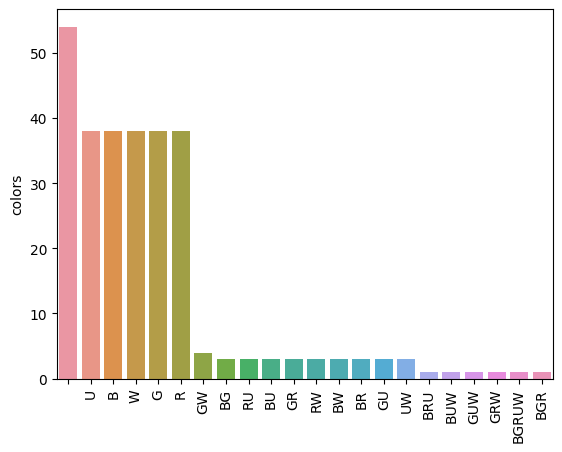

In [9]:
# Plot how many cards we got of each color / color combination

count_by_color = sns.barplot(x=[''.join(color for color in colors) for colors in dmu_df.colors.value_counts().index],
                 y=dmu_df.colors.value_counts())

for item in count_by_color.get_xticklabels():
    item.set_rotation(90)

In [10]:
# Oops! We really should remove 'Land' type cards when looking at the set (these count as colorless!)
dmu_df_no_lands = dmu_df[~dmu_df['type_line'].astype(str).str.contains('Land')]

dmu_df_no_lands.shape

(242, 84)

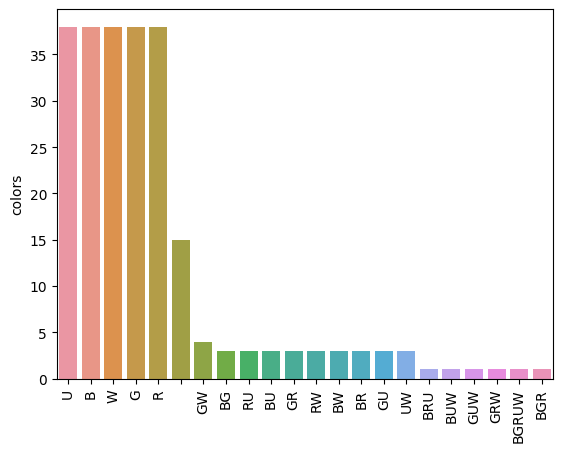

In [11]:
# Yep, this checks out! We have 20 Basic Lands and 19 Non-Basic Lands thus 242 + 20 + 19 = 281 which is the number of cards
# when filtered by set dmu and booster True. So let's plot the set again:
count_by_color = sns.barplot(x=[''.join(color for color in colors) for colors in dmu_df_no_lands.colors.value_counts().index],
                 y=dmu_df_no_lands.colors.value_counts())

for item in count_by_color.get_xticklabels():
    item.set_rotation(90)

In [12]:
# Wrap this up in a method..
def plot_card_count_by_color(set: str) -> None:
    set_df = df[(df['set'] == set) & (df['booster'] == True) & (~df['type_line'].astype(str).str.contains('Land'))]
    set_colors = set_df.colors.value_counts()
    count_by_color = sns.barplot(x=[''.join(color for color in colors) for colors in set_colors.index],
                                 y=set_colors)
    count_by_color.set(xlabel='Colors', ylabel='Count')
    for item in count_by_color.get_xticklabels():
        item.set_rotation(90)

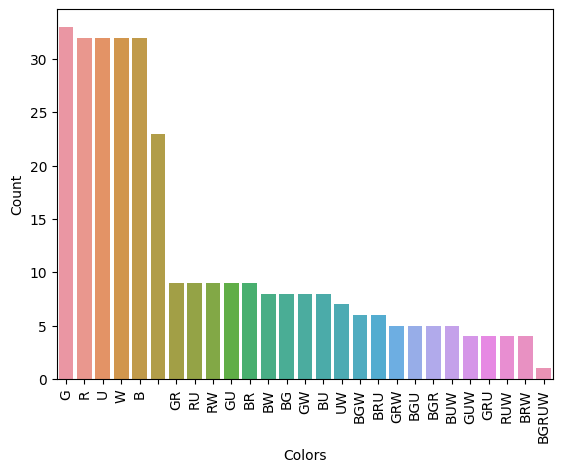

In [13]:
# ..and use it for all the sets you want to
plot_card_count_by_color('2x2')

In [14]:
# Now the question arises, apart from card count by color what else is there to look at in a single set?
# How about card cost by color? Maybe power and toughness of creature type cards?

# Same graph for mana value (converted mana cost) per card:
def plot_card_count_by_mv(set: str) -> None:
    # We still do not want Lands as they are cards with mana value (mv) of 0
    set_df = df[(df['set'] == set) & (df['booster'] == True) & (~df['type_line'].astype(str).str.contains('Land'))]
    set_cmcs = set_df.cmc.value_counts()
    count_by_cmc = sns.barplot(x=set_cmcs.index,
                                 y=set_cmcs)
    count_by_cmc.set(xlabel='Mana Cost', ylabel='Count')
    for item in count_by_cmc.get_xticklabels():
        item.set_rotation(90)

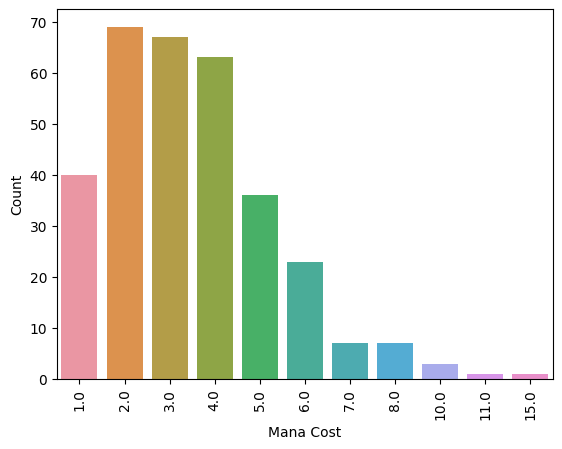

In [15]:
plot_card_count_by_mv('2x2')

In [16]:
# Average mv per color and throughout the whole set
def average_mv_by_color(set: str) -> list[float]:
    set_df = df[(df['set'] == set) & (df['booster'] == True) & (~df['type_line'].astype(str).str.contains('Land'))]
    set_df.loc[:, 'colors'] = set_df['colors'].apply(''.join)
    colors = set_df.colors.unique()
    d = {color: (set_df[set_df['colors'] == color]['cmc']).mean() for color in colors}
    mv_by_color = sns.barplot(x=list(d), y=list(d.values()))
    for item in mv_by_color.get_xticklabels():
        item.set_rotation(90)

C:\Users\Tim Eckle\AppData\Local\Temp\ipykernel_508\2592603810.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_df.loc[:, 'colors'] = set_df['colors'].apply(''.join)


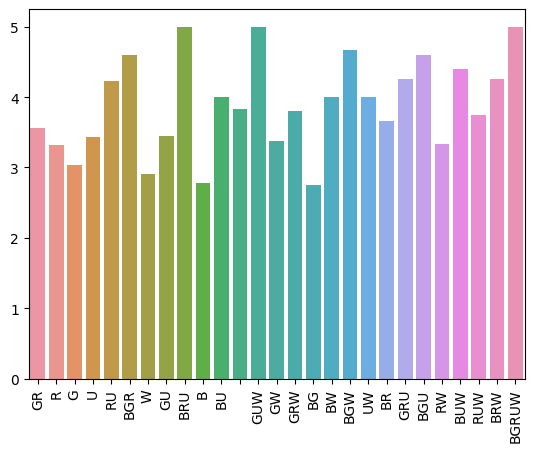

In [17]:
average_mv_by_color('2x2')

In [18]:
def get_set(set_name: str, without_basic_lands: bool = True) -> pd.DataFrame:
    """
    set_name: set name abbreviation, three letters
    without_basic_lands: should the resulting DataFrame containg land cards
    return: pd.DataFrame containing all cards of the given set
    """
    set_df = df[df['set'] == set_name]
    set_df = set_df[set_df['booster'] == True]
    
    # Color
    def color_handling(color_list: list) -> str:
        if color_list is np.nan:  # Double Faced cards
            return 'C'
        elif not color_list:
            return 'C'
        else:
            color_order = 'WUBRG'
            return ''.join(sorted(color_list, key=lambda colors: [color_order.index(c) for c in colors]))
    
    set_df['colors'] = set_df['colors'].apply(color_handling)
    
    # Type Line - One Hot Encoded
    card_types = ['Land', 'Creature', 'Artifact', 'Enchantment', 'Planeswalker', 'Instant', 'Sorcery']
    for card_type in card_types:
        set_df[card_type.lower()] = set_df['type_line'].str.contains(card_type)
        # Not looking at any subtypes e.g. Equipment, Aura, etc.
    
    
    # Lands
    if not without_basic_lands:
        return set_df
    
    set_df = set_df[~set_df['type_line'].astype(str).str.contains('Basic Land')]
        
    return set_df

In [19]:
dmu_df = get_set('dmu')

dmu_df.head()

,object,id,oracle_id,multiverse_ids,mtgo_id,mtgo_foil_id,tcgplayer_id,cardmarket_id,name,lang,...,content_warning,flavor_name,variation_of,land,creature,artifact,enchantment,planeswalker,instant,sorcery
10,card,000376ef-8b6c-490d-98cb-d6de15b2e585,49f0b317-6b06-482e-ab64-e02713e6c7e8,[574523],102562.0,NaN,283405.0,672314.0,Battlewing Mystic,en,...,NaN,NaN,NaN,False,True,False,False,False,False,False
440,card,017a3c6b-9a1e-403a-9c20-2360090d39ee,d64feb23-8259-4445-9b40-efc8b4466679,[574550],102616.0,NaN,283173.0,671917.0,Timely Interference,en,...,NaN,NaN,NaN,False,False,False,False,False,True,False
496,card,01a51d08-f90e-4b72-8dce-fb2a6c72f181,6dbef43d-40d3-4894-86a5-d31a5026604e,[574574],102664.0,NaN,283478.0,672347.0,Extinguish the Light,en,...,NaN,NaN,NaN,False,False,False,False,False,True,False
1024,card,0368e91c-31ee-4b81-a361-30a4555b1a42,b38c0575-37f7-413c-9dad-c8d7e6a41b90,[574591],102698.0,NaN,282812.0,671566.0,Tattered Apparition,en,...,NaN,NaN,NaN,False,True,False,False,False,False,False
1041,card,037cb79c-163d-4b36-bd93-954eca8fe26e,e49eb21c-2a0d-4fd0-9f69-1bff6e94f9e7,[574493],102502.0,NaN,283668.0,672642.0,Clockwork Drawbridge,en,...,NaN,NaN,NaN,False,True,True,False,False,False,False


In [20]:
def visualize_set(set_name: str) -> None:
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    set_df = get_set(set_name)
    
    # Anzahl der Karten pro Farbe
    axes[0].set_title('Anzahl der Karten pro Farbe')
    cards_per_color = set_df.groupby(['colors'])['colors'].count()
    sns.barplot(ax=axes[0], x=cards_per_color.index, y=cards_per_color.values)
    for item in axes[0].get_xticklabels():
        item.set_rotation(90)
    
    # Anzahl der Karten pro Kartentyp
    axes[1].set_title('Anzahl der Karten pro Kartentype')
    cards_per_type = []
    card_types = ['Land', 'Creature', 'Artifact', 'Enchantment', 'Planeswalker', 'Instant', 'Sorcery']
    for card_type in card_types:
        cards_per_type.append(set_df[card_type.lower()].values.sum())
    sns.barplot(ax=axes[1], x=card_types, y=cards_per_type)
    for item in axes[1].get_xticklabels():
        item.set_rotation(90)
        
    # Anzahl der Karten pro Seltenheit
    axes[2].set_title('Anzahl der Karten pro Seltenheit')
    rarity_order = ['common', 'uncommon', 'rare', 'mythic']
    cards_per_rarity = set_df.groupby(['rarity'])['rarity'].count()
    cards_per_rarity.sort_index(inplace=True, key=lambda idxs: [rarity_order.index(i) for i in idxs])  # has to return list the same size as the Series 
    sns.barplot(ax=axes[2], x=cards_per_rarity.index, y=cards_per_rarity.values, palette=['Black', 'Grey', 'Gold', 'Orange'])

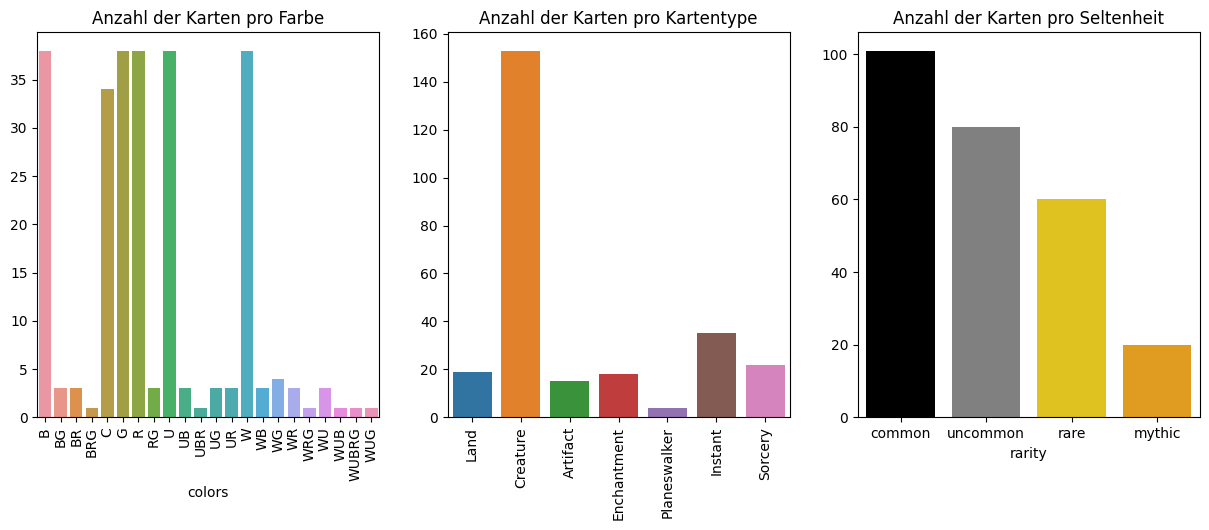

In [21]:
visualize_set('dmu')

In [22]:
def visualize_sets(set_names: list[str]) -> None:
    fig, axes = plt.subplots(len(set_names), 3, figsize=(15, 5 * len(set_names)), sharex='col')
    
    axes[0][0].set_title('Anzahl der Karten pro Farbkombination')
    axes[0][1].set_title('Anzahl der Karten pro Kartentype')
    axes[0][2].set_title('Anzahl der Karten pro Seltenheit')
    
    for i, s in enumerate(set_names):
        set_df = get_set(s)
        
        axes[i][0].set_ylabel(s)
        
        # Anzahl der Karten pro Farbe
        color_order = ['C', 'W', 'U', 'B', 'R', 'G',
                       'WU', 'UB', 'BR', 'RG', 'WG', 'WB', 'UR', 'BG', 'WR', 'UG',
                       'WUB', 'UBR', 'BRG', 'WRG', 'WUG', 'WBG', 'WUR', 'UBG', 'WBR', 'URG',
                       'WUBR', 'UBRG', 'WBRG', 'WURG', 'WUBG', 
                       'WUBRG']
        # cards_per_color = set_df.groupby(['colors'])['colors'].count()
        # cards_per_color.sort_index(inplace=True, key=lambda colors: [color_order.index(c) for c in colors])
        cards_per_color = []
        for color in color_order:
            cards_per_color.append(len(set_df[set_df['colors'].str.fullmatch(color)].index))
        sns.barplot(ax=axes[i][0], x=color_order, y=cards_per_color)
        for item in axes[i][0].get_xticklabels():
            item.set_rotation(90)
    
        # Anzahl der Karten pro Kartentyp
        cards_per_type = []
        card_types = ['Land', 'Creature', 'Artifact', 'Enchantment', 'Planeswalker', 'Instant', 'Sorcery']
        for card_type in card_types:
            cards_per_type.append(set_df[card_type.lower()].values.sum())
        sns.barplot(ax=axes[i][1], x=card_types, y=cards_per_type)
        for item in axes[i][1].get_xticklabels():
            item.set_rotation(90)
        
        # Anzahl der Karten pro Seltenheit
        rarity_order = ['common', 'uncommon', 'rare', 'mythic']
        cards_per_rarity = set_df.groupby(['rarity'])['rarity'].count()
        cards_per_rarity.sort_index(inplace=True, key=lambda idxs: [rarity_order.index(i) for i in idxs])  # has to return list the same size as the Series 
        sns.barplot(ax=axes[i][2], x=cards_per_rarity.index.values, y=cards_per_rarity.values, palette=['Black', 'Grey', 'Gold', 'Orange'])

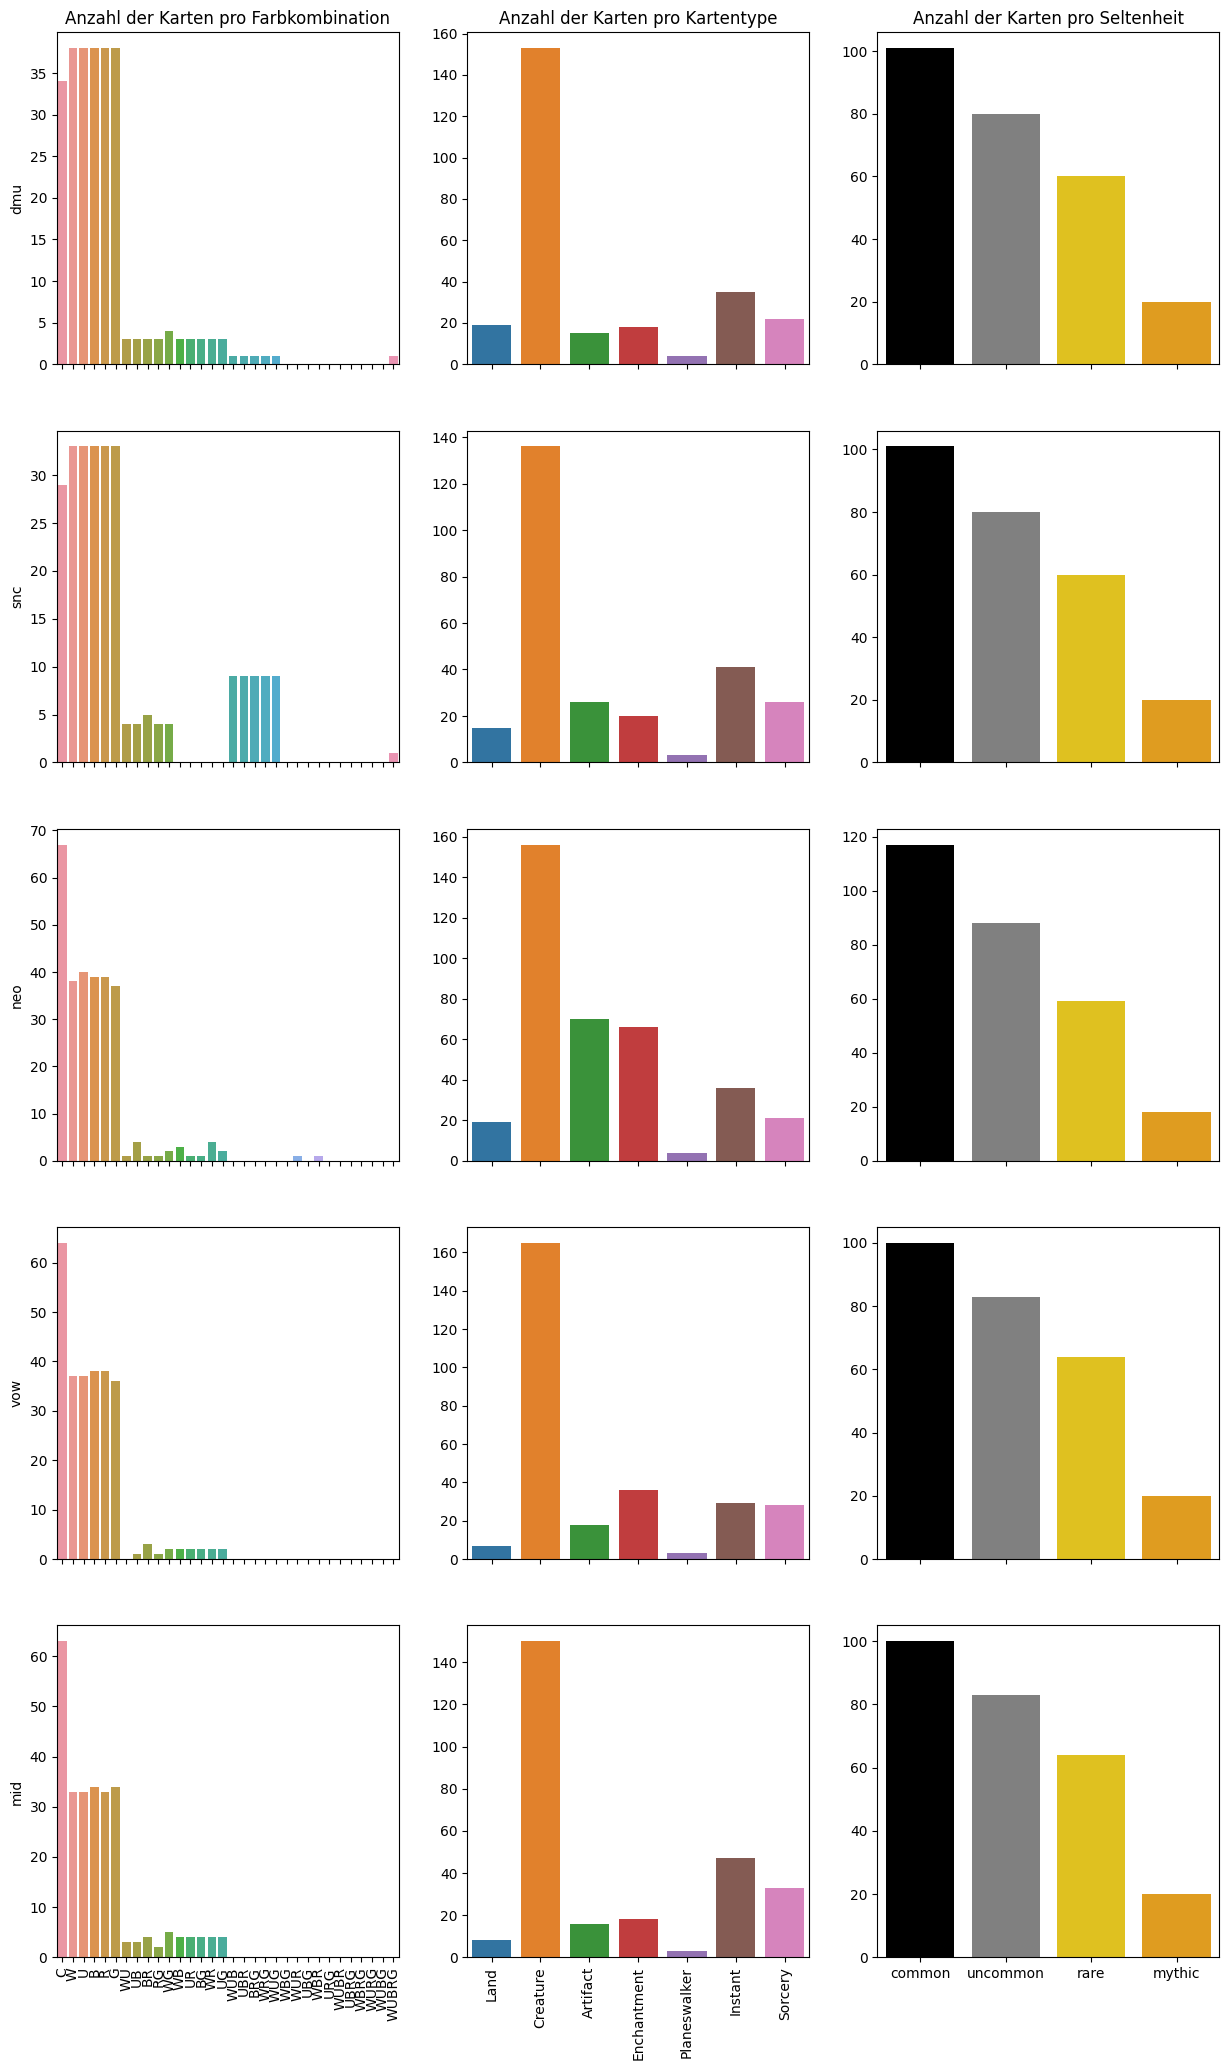

In [23]:
visualize_sets(['dmu', 'snc', 'neo', 'vow', 'mid'])